In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_excel("Data_Train.xlsx")
testing_data = pd.read_excel("Test_set.xlsx")

In [3]:
training_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
testing_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
training_data.shape

(10683, 11)

In [7]:
testing_data.shape

(2671, 10)

In [8]:
training_data.isnull().values.any()

True

In [9]:
training_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
training_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
testing_data.isnull().values.any()

False

In [12]:
testing_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [13]:
testing_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [15]:
training_data = training_data.dropna()

In [18]:
#splitting dateof journey into day/month/year
training_data['day'] = pd.to_datetime(training_data.Date_of_Journey,format='%d/%m/%Y').dt.day
training_data.head(5)

<ipython-input-18-d84280f9b021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['day'] = pd.to_datetime(training_data.Date_of_Journey,format='%d/%m/%Y').dt.day


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [19]:
training_data['month'] = pd.to_datetime(training_data.Date_of_Journey,format='%d/%m/%Y').dt.month
training_data['year'] = pd.to_datetime(training_data.Date_of_Journey,format='%d/%m/%Y').dt.year
training_data.head(5)

<ipython-input-19-0cc699ad8bee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['month'] = pd.to_datetime(training_data.Date_of_Journey,format='%d/%m/%Y').dt.month
<ipython-input-19-0cc699ad8bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['year'] = pd.to_datetime(training_data.Date_of_Journey,format='%d/%m/%Y').dt.year


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [20]:
testing_data['day'] = pd.to_datetime(testing_data.Date_of_Journey,format='%d/%m/%Y').dt.day
testing_data['month'] = pd.to_datetime(testing_data.Date_of_Journey,format='%d/%m/%Y').dt.month
testing_data['year'] = pd.to_datetime(testing_data.Date_of_Journey,format='%d/%m/%Y').dt.year
testing_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [21]:
training_data.drop(labels='Date_of_Journey',inplace=True,axis=1)
training_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [22]:
testing_data.drop(labels='Date_of_Journey',axis=1,inplace=True)
testing_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [23]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  day              10682 non-null  int64 
 11  month            10682 non-null  int64 
 12  year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [24]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   object
 8   Additional_Info  2671 non-null   object
 9   day              2671 non-null   int64 
 10  month            2671 non-null   int64 
 11  year             2671 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 250.5+ KB


In [27]:
duration = list(training_data['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2: 
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1])) #for examole if duration is 49 mintutes 4 sec then it will reflect like 
    dur_minutes.append(int(duration[i].split()[1][:-1]))#0:49:4 and if 2 hours 10 seconds then it will reflect like 2:0:10
    
training_data['Duration_hours'] = dur_hours
training_data['Duration_minutes'] =dur_minutes

training_data.drop(labels = 'Duration', axis = 1, inplace = True) # dropping the original duration column from training set

In [28]:
training_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day,month,year,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45


In [29]:
durationT = list(testing_data['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()[0]) != 2:       
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    #print(durationT[i].split())
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    if(len(durationT[i].split())>1):
        dur_minutes.append(int(durationT[i].split()[1][:-1]))
    else:
        dur_minutes.append(int(0))
  
    
testing_data['Duration_hours'] = dur_hours
testing_data['Duration_minutes'] = dur_minutes

testing_data.drop(labels = 'Duration', axis = 1, inplace = True) #  dropping the original duration column from training set

In [30]:
testing_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,day,month,year,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,1 stop,No info,6,6,2019,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,1 stop,No info,12,5,2019,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1 stop,In-flight meal not included,21,5,2019,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,1 stop,No info,21,5,2019,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,non-stop,No info,24,6,2019,2,50


In [33]:
training_data['Dpat_Hr'] = pd.to_datetime(training_data.Dep_Time).dt.hour
training_data['Dpat_Min'] = pd.to_datetime(training_data.Dep_Time).dt.minute
training_data.drop(labels='Dep_Time',axis=1,inplace=True)
training_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,2019,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,2019,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,2019,4,45,16,50


In [34]:
testing_data['Dpat_Hr'] = pd.to_datetime(testing_data.Dep_Time).dt.hour
testing_data['Dpat_Min'] = pd.to_datetime(testing_data.Dep_Time).dt.minute
testing_data.drop(labels='Dep_Time',axis=1,inplace=True)
testing_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6,6,2019,10,55,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12,5,2019,4,0,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21,5,2019,23,45,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,1 stop,No info,21,5,2019,13,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,non-stop,No info,24,6,2019,2,50,23,55


In [35]:
training_data['Arv_hrs'] = pd.to_datetime(training_data.Arrival_Time).dt.hour
training_data['Arv_mins'] = pd.to_datetime(training_data.Arrival_Time).dt.minute
training_data.drop(labels='Arrival_Time',axis=1,inplace=True)
training_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,4,45,16,50,21,35


In [36]:
testing_data['Arv_hrs'] = pd.to_datetime(testing_data.Arrival_Time).dt.hour
testing_data['Arv_mins'] = pd.to_datetime(testing_data.Arrival_Time).dt.minute
testing_data.drop(labels='Arrival_Time',axis=1,inplace=True)
testing_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,2,50,23,55,2,45


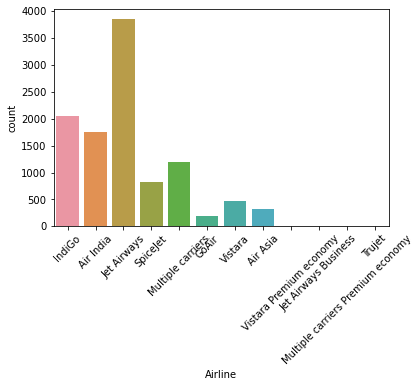

In [38]:
sns.countplot(x='Airline',data=training_data)
plt.xticks(rotation=45)
plt.show()

In [39]:
training_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

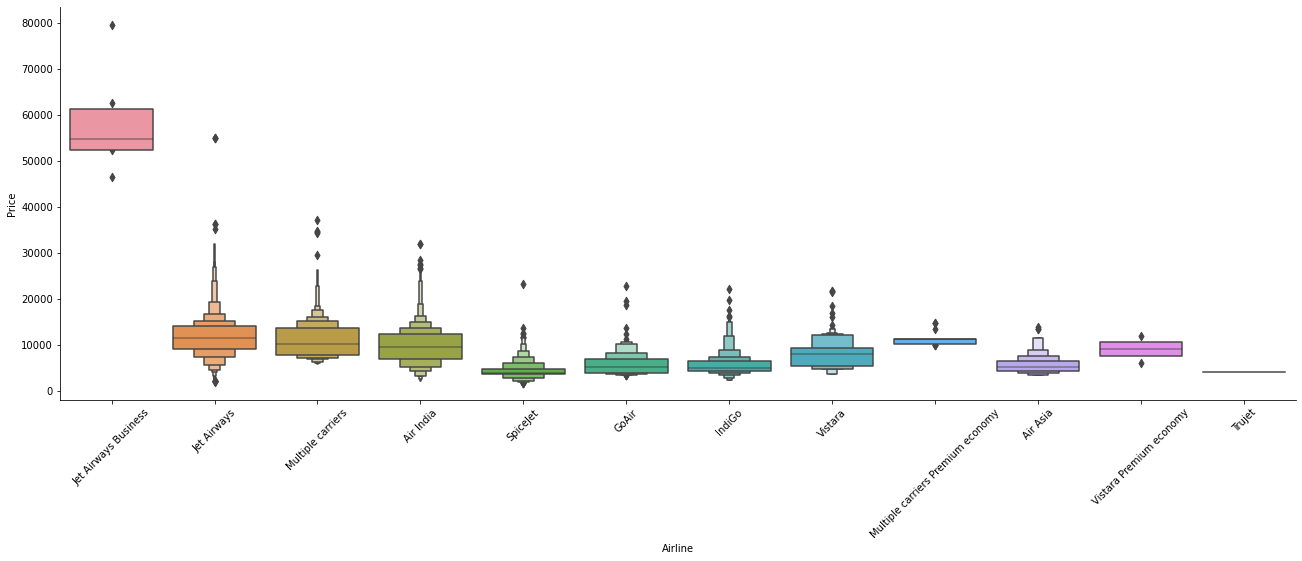

In [44]:
sns.catplot(x="Airline",y="Price",data=training_data.sort_values("Price",ascending=False),kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation=45)
plt.show()

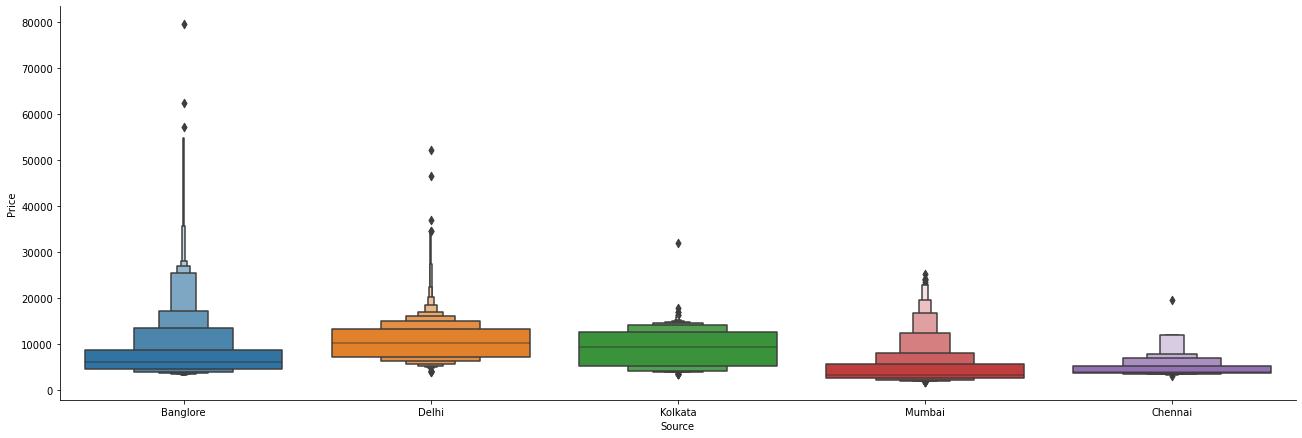

In [45]:
sns.catplot(x="Source",y="Price",data=training_data.sort_values("Price",ascending=False),kind="boxen", height = 6, aspect = 3)
plt.show()

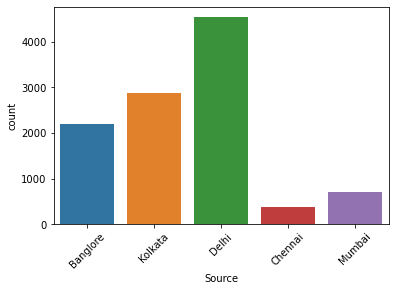

In [46]:
sns.countplot(x='Source',data=training_data)
plt.xticks(rotation=45)
plt.show()

In [47]:
Airline = training_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [49]:
Source = training_data[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


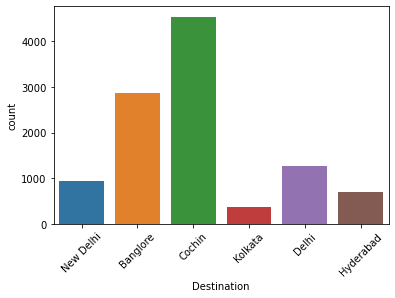

In [50]:
sns.countplot(x='Destination',data=training_data)
plt.xticks(rotation=45)
plt.show()

In [51]:
Destination = training_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head(5)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
training_data["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → GOI → HYD                   1
BOM → NDC → HYD                   1
BOM → BBI → HYD                   1
BLR → HBX → BOM → AMD → DEL       1
BOM → VNS → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [55]:
training_data.drop(["Route","Additional_Info"],axis=1,inplace=True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,4,45,16,50,21,35


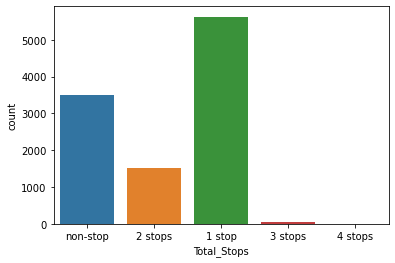

In [56]:
sns.countplot(x='Total_Stops',data=training_data)
plt.show()

In [80]:
training_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,16,50,21,35


In [81]:
data_train = pd.concat([training_data,Airline,Source,Destination],axis=1)
data_train.head(5)

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,...,0,0,0,0,0,0,0,0,0,1


In [82]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head(5)

,Total_Stops,Price,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,2,50,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,7,25,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,19,0,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,5,25,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,4,45,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [83]:
TAirline = testing_data[["Airline"]]

TAirline = pd.get_dummies(TAirline, drop_first= True)

TAirline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [84]:
TSource = testing_data[["Source"]]

TSource = pd.get_dummies(TSource, drop_first= True)

TSource.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [85]:
TDestination = testing_data[["Destination"]]
TDestination = pd.get_dummies(TDestination, drop_first= True)
TDestination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [86]:
testing_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
testing_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,2019,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,2019,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,2019,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,2019,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,2019,2,50,23,55,2,45


In [87]:
data_test = pd.concat([testing_data,TAirline,TSource,TDestination],axis=1)
data_test.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,month,year,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,2019,10,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,2019,4,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,2019,23,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,2019,13,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,2019,2,...,0,0,0,0,0,0,1,0,0,0


In [88]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.head(5)

,Route,Total_Stops,Additional_Info,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1,No info,6,6,2019,10,55,17,30,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1,No info,12,5,2019,4,0,6,20,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1,In-flight meal not included,21,5,2019,23,45,19,15,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,1,No info,21,5,2019,13,0,8,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,0,No info,24,6,2019,2,50,23,55,...,0,0,0,0,0,0,1,0,0,0


In [89]:
data_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stop":3,"4 stop":4},inplace=True)
data_test.head()

,Route,Total_Stops,Additional_Info,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1,No info,6,6,2019,10,55,17,30,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1,No info,12,5,2019,4,0,6,20,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1,In-flight meal not included,21,5,2019,23,45,19,15,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,1,No info,21,5,2019,13,0,8,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,0,No info,24,6,2019,2,50,23,55,...,0,0,0,0,0,0,1,0,0,0


In [90]:
data_test.drop(["Route","Additional_Info"],axis=1,inplace=True)
data_test.head()

,Total_Stops,day,month,year,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,10,55,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,4,0,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,23,45,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,13,0,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,2,50,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0


In [91]:
data_train.shape

(10682, 31)

In [92]:
data_train.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'year', 'Duration_hours',
       'Duration_minutes', 'Dpat_Hr', 'Dpat_Min', 'Arv_hrs', 'Arv_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [93]:
X = data_train.loc[:, ['Total_Stops', 'day', 'month', 'Duration_hours',
       'Duration_minutes', 'Dpat_Hr', 'Dpat_Min', 'Arv_hrs',
       'Arv_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,day,month,Duration_hours,Duration_minutes,Dpat_Hr,Dpat_Min,Arv_hrs,Arv_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2,50,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,7,25,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,19,0,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,5,25,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,4,45,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

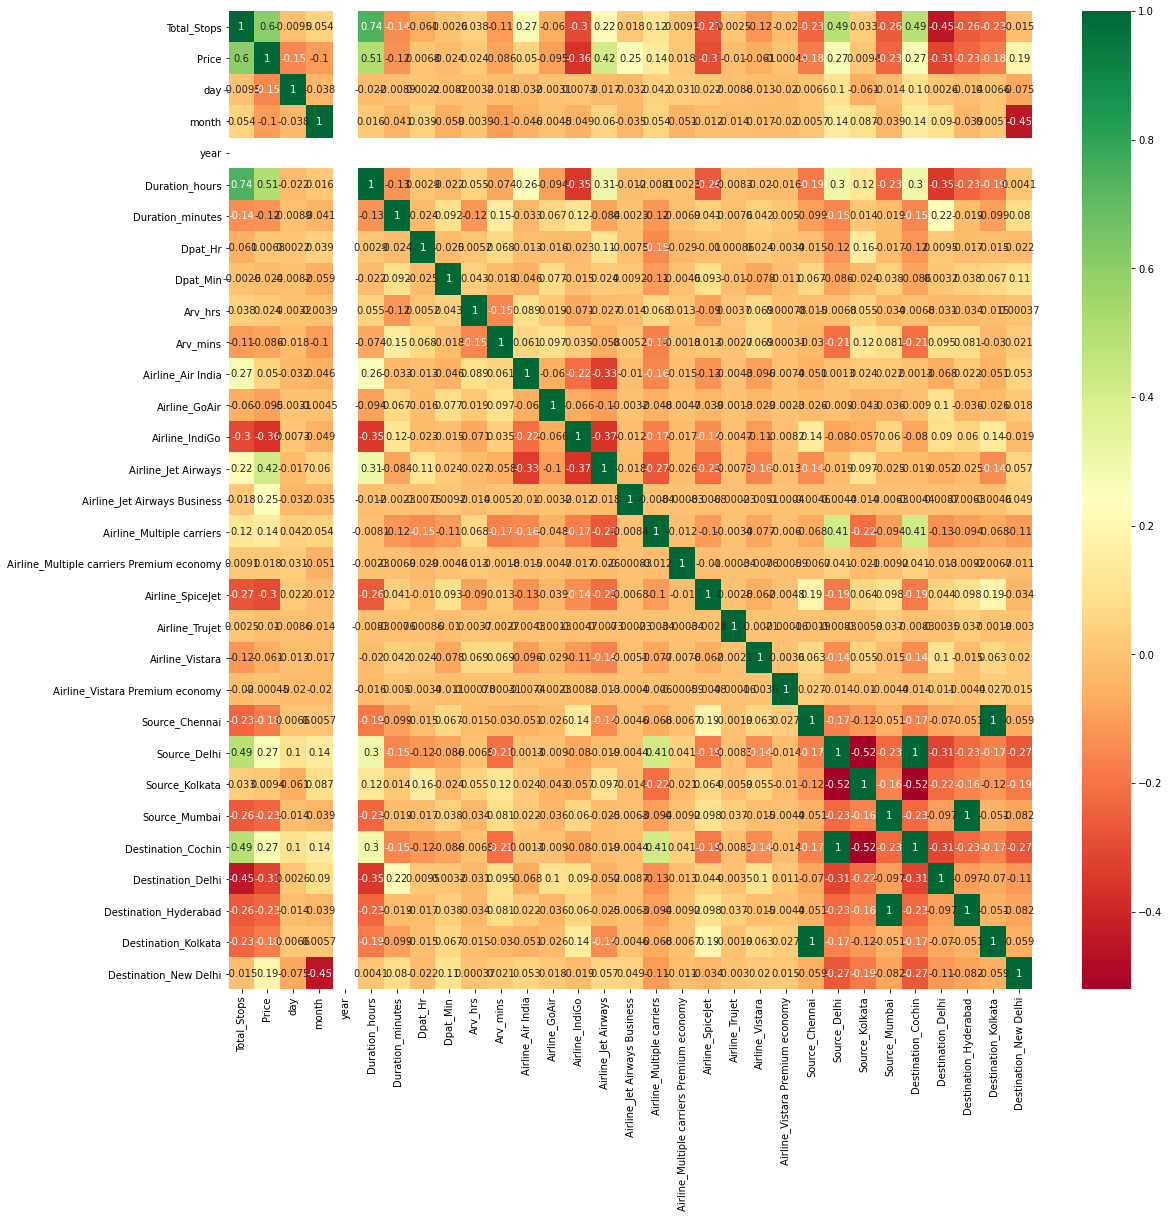

In [95]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [96]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

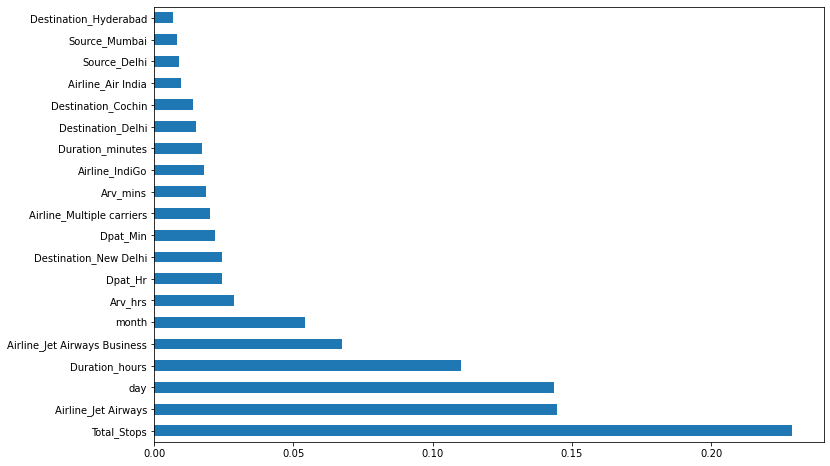

In [97]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
y_pred = model.predict(X_test)
print("Training score:",model.score(X_train, y_train)*100)
print("Testing score:",model.score(X_test, y_test)*100)

Training score: 95.32244460448621
Testing score: 79.80752502789572


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


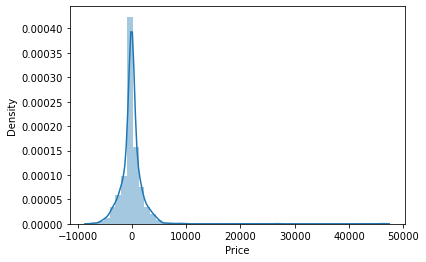

In [102]:
sns.distplot(y_test-y_pred)
plt.show()

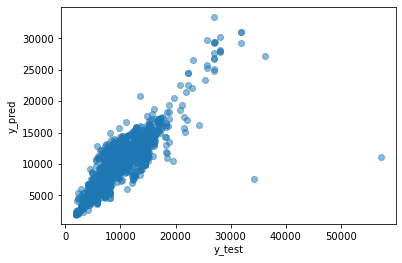

In [103]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [104]:
from sklearn import metrics
print("Metrics Score:",metrics.r2_score(y_test, y_pred)*100)

Metrics Score: 79.80752502789572
